In [106]:
import pandas as pd
import numpy as np

all_data = pd.read_csv('groceries - groceries.csv')
print(all_data) #Видно, что датафрейм содержит NaN значения



      Item(s)               Item 1               Item 2            Item 3  \
0           4         citrus fruit  semi-finished bread         margarine   
1           3       tropical fruit               yogurt            coffee   
2           1           whole milk                  NaN               NaN   
3           4            pip fruit               yogurt      cream cheese   
4           4     other vegetables           whole milk    condensed milk   
...       ...                  ...                  ...               ...   
9830       17              sausage              chicken              beef   
9831        1    cooking chocolate                  NaN               NaN   
9832       10              chicken         citrus fruit  other vegetables   
9833        4  semi-finished bread        bottled water              soda   
9834        5              chicken       tropical fruit  other vegetables   

                        Item 4         Item 5          Item 6  \
0         

In [107]:
from collections import Counter

np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

unique_items = set()

for row in np_data:
  for elem in row:
    unique_items.add(elem)

item_counts = Counter([item for sublist in np_data for item in sublist])
print(item_counts.most_common())

[('whole milk', 2513), ('other vegetables', 1903), ('rolls/buns', 1809), ('soda', 1715), ('yogurt', 1372), ('bottled water', 1087), ('root vegetables', 1072), ('tropical fruit', 1032), ('shopping bags', 969), ('sausage', 924), ('pastry', 875), ('citrus fruit', 814), ('bottled beer', 792), ('newspapers', 785), ('canned beer', 764), ('pip fruit', 744), ('fruit/vegetable juice', 711), ('whipped/sour cream', 705), ('brown bread', 638), ('domestic eggs', 624), ('frankfurter', 580), ('margarine', 576), ('coffee', 571), ('pork', 567), ('butter', 545), ('curd', 524), ('beef', 516), ('napkins', 515), ('chocolate', 488), ('frozen vegetables', 473), ('chicken', 422), ('white bread', 414), ('cream cheese', 390), ('waffles', 378), ('salty snack', 372), ('long life bakery product', 368), ('dessert', 365), ('sugar', 333), ('UHT-milk', 329), ('hamburger meat', 327), ('berries', 327), ('hygiene articles', 324), ('onions', 305), ('specialty chocolate', 299), ('candy', 294), ('misc. beverages', 279), ('f

In [108]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
df = pd.DataFrame(te_ary, columns=te.columns_)

result_fpgrowth = fpgrowth(df, min_support=0.03, use_colnames=True)
print(result_fpgrowth)

     support                             itemsets
0   0.082766                       (citrus fruit)
1   0.058566                          (margarine)
2   0.139502                             (yogurt)
3   0.104931                     (tropical fruit)
4   0.058058                             (coffee)
..       ...                                  ...
58  0.033249                 (whole milk, pastry)
59  0.047382  (root vegetables, other vegetables)
60  0.048907        (root vegetables, whole milk)
61  0.030605                (rolls/buns, sausage)
62  0.032232     (whipped/sour cream, whole milk)

[63 rows x 2 columns]


In [109]:
support_values = [0.01, 0.02, 0.03, 0.05, 0.1]
for support_fpgrowth in support_values:
    resultg = fpgrowth(df, min_support=support_fpgrowth, use_colnames=True)
    print(f'Поддержка {support_fpgrowth}: {len(resultg)} частых наборов')

Поддержка 0.01: 333 частых наборов
Поддержка 0.02: 122 частых наборов
Поддержка 0.03: 63 частых наборов
Поддержка 0.05: 31 частых наборов
Поддержка 0.1: 8 частых наборов


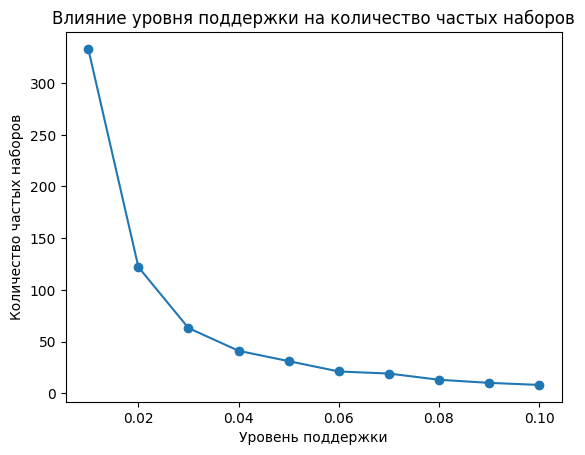

In [110]:
import numpy as np
import matplotlib.pyplot as plt

support_levels = np.linspace(0.01, 0.1, 10)
frequent_item_counts = []

for support in support_levels:
    result = fpgrowth(df, min_support=support, use_colnames=True)
    frequent_item_counts.append(len(result))

plt.plot(support_levels, frequent_item_counts, marker='o')
plt.xlabel('Уровень поддержки')
plt.ylabel('Количество частых наборов')
plt.title('Влияние уровня поддержки на количество частых наборов')
plt.show()

In [111]:
from mlxtend.frequent_patterns import fpmax

result_fpmax = fpmax(df, min_support=0.03, use_colnames=True)

support_values = [0.01, 0.02, 0.03, 0.05, 0.1]

for support_fpmax in support_values:
    resultm = fpmax(df, min_support=support_fpmax, use_colnames=True)
    print(f'Поддержка {support_fpmax}: {len(resultm)} частых наборов')

Поддержка 0.01: 243 частых наборов
Поддержка 0.02: 91 частых наборов
Поддержка 0.03: 50 частых наборов
Поддержка 0.05: 27 частых наборов
Поддержка 0.1: 8 частых наборов


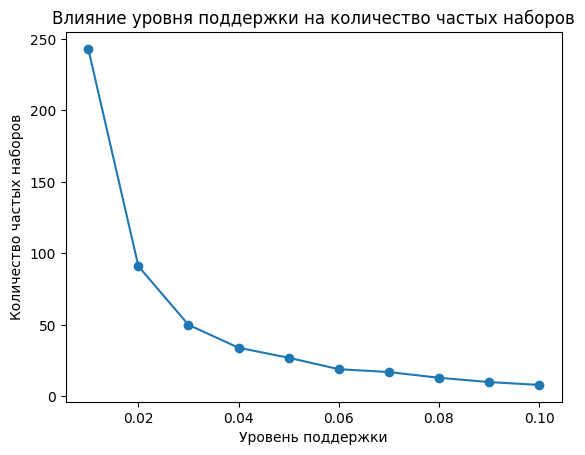

In [112]:
import numpy as np
import matplotlib.pyplot as plt

support_levels = np.linspace(0.01, 0.1, 10)
frequent_item_counts1 = []

for support1 in support_levels:
    result1 = fpmax(df, min_support=support1, use_colnames=True)
    frequent_item_counts1.append(len(result1))

plt.plot(support_levels, frequent_item_counts1, marker='o')
plt.xlabel('Уровень поддержки')
plt.ylabel('Количество частых наборов')
plt.title('Влияние уровня поддержки на количество частых наборов')
plt.show()

# **Визуализация**

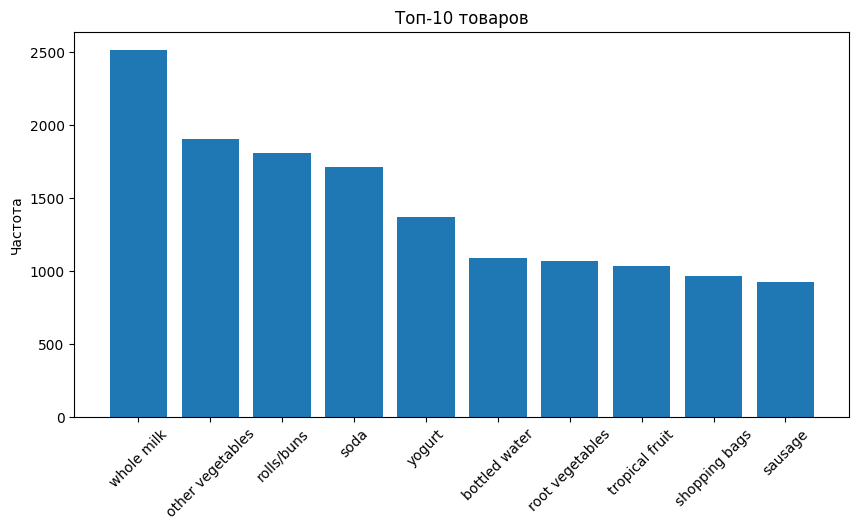

In [113]:
import matplotlib.pyplot as plt

top_items = item_counts.most_common(10)
items, counts = zip(*top_items)

plt.figure(figsize=(10,5))
plt.bar(items, counts)
plt.xticks(rotation=45)
plt.ylabel('Частота')
plt.title('Топ-10 товаров')
plt.show()

In [114]:
items = ['whole milk','sausage','yogurt','soda','tropical fruit','shopping bags','vegetables','pork','bottled beer','whipped/sour cream','rolls/buns','other vegetables','root','bottled water','pastry','citrus fruit','canned beer']
np_data_inclusive = all_data.to_numpy()
np_data_inclusive = [[elem for elem in row[1:] if isinstance(elem,str) and elem in items] for row in np_data_inclusive]

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

te_inc = TransactionEncoder()
te_ary_inc = te_inc.fit(np_data_inclusive).transform(np_data_inclusive)
df_inc = pd.DataFrame(te_ary_inc, columns=te_inc.columns_)
print(df_inc)

      bottled beer  bottled water  canned beer  citrus fruit  \
0            False          False        False          True   
1            False          False        False         False   
2            False          False        False         False   
3            False          False        False         False   
4            False          False        False         False   
...            ...            ...          ...           ...   
9830         False          False        False          True   
9831         False          False        False         False   
9832         False          False        False          True   
9833          True           True        False         False   
9834         False          False        False         False   

      other vegetables  pastry   pork  rolls/buns  sausage  shopping bags  \
0                False   False  False       False    False          False   
1                False   False  False       False    False          False   


In [115]:
support_values = [0.01, 0.02, 0.03, 0.05, 0.1]
for support_fpgrowth_inc in support_values:
    resultg_inc = fpgrowth(df_inc, min_support=support_fpgrowth_inc, use_colnames=True)
    print(f'Поддержка {support_fpgrowth_inc}: {len(resultg_inc)} частых наборов')

Поддержка 0.01: 105 частых наборов
Поддержка 0.02: 56 частых наборов
Поддержка 0.03: 31 частых наборов
Поддержка 0.05: 18 частых наборов
Поддержка 0.1: 7 частых наборов


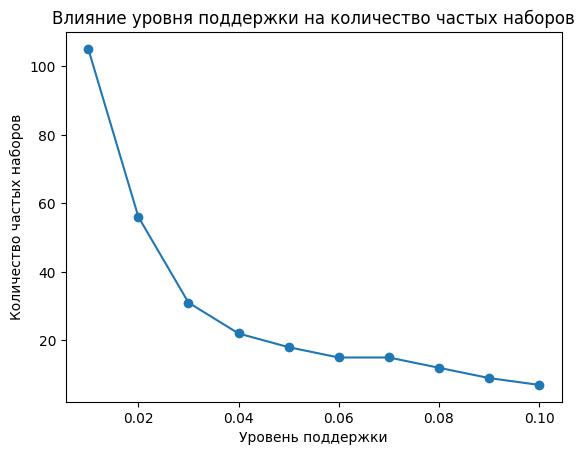

In [116]:
import numpy as np
import matplotlib.pyplot as plt

support_levels = np.linspace(0.01, 0.1, 10)
frequent_item_counts_inc = []

for support_inc in support_levels:
    result_inc = fpgrowth(df_inc, min_support=support_inc, use_colnames=True)
    frequent_item_counts_inc.append(len(result_inc))

plt.plot(support_levels, frequent_item_counts_inc, marker='o')
plt.xlabel('Уровень поддержки')
plt.ylabel('Количество частых наборов')
plt.title('Влияние уровня поддержки на количество частых наборов')
plt.show()

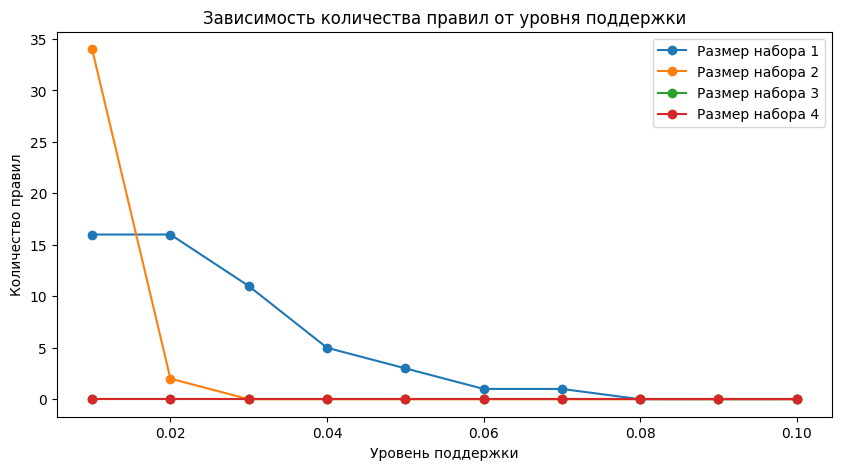

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules

support_levels = np.linspace(0.01, 0.1, 10)
rule_counts = {1: [], 2: [], 3: [], 4: []}

for support3 in support_levels:
    result_rules = fpgrowth(df_inc, min_support=support3, use_colnames=True)
    rules = association_rules(result_rules, metric='confidence', min_threshold=0.3)

    for size in rule_counts.keys():
        filtered_rules = rules[rules['antecedents'].apply(lambda x: len(x) == size)]
        rule_counts[size].append(len(filtered_rules))

plt.figure(figsize=(10, 5))
for size, counts in rule_counts.items():
    plt.plot(support_levels, counts, marker='o', label=f'Размер набора {size}')

plt.xlabel('Уровень поддержки')
plt.ylabel('Количество правил')
plt.title('Зависимость количества правил от уровня поддержки')
plt.legend()
plt.show()

In [118]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str) and elem in items] for row in np_data]
np_data = [row for row in np_data if len(row) > 1]

result_ = fpgrowth(df, min_support=0.05, use_colnames = True)

rules_ = association_rules(result_, min_threshold = 0.3)
print(rules_)

          antecedents   consequents  antecedent support  consequent support  \
0            (yogurt)  (whole milk)            0.139502            0.255516   
1  (other vegetables)  (whole milk)            0.193493            0.255516   
2        (rolls/buns)  (whole milk)            0.183935            0.255516   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.056024    0.401603  1.571735               1.0  0.020379    1.244132   
1  0.074835    0.386758  1.513634               1.0  0.025394    1.214013   
2  0.056634    0.307905  1.205032               1.0  0.009636    1.075696   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.422732  0.165267   0.196226    0.310432  
1       0.420750  0.200000   0.176286    0.339817  
2       0.208496  0.147942   0.070369    0.264776  


	1.	antecedents – левосторонняя часть правила (множество товаров, предпосылка).
	2.	consequents – правосторонняя часть правила (множество товаров, следствие).
	3.	antecedent support – поддержка (support) для antecedents (доля транзакций, содержащих этот набор).
	4.	consequent support – поддержка для consequents.
	5.	support – поддержка для всего правила (antecedents + consequents).
	6.	confidence – доверие (confidence), показывает, с какой вероятностью покупают consequents, если купили antecedents.
	7.	lift – прирост (lift), показывает, во сколько раз вероятность покупки consequents увеличивается при покупке antecedents.
	8.	leverage – разница между ожидаемой и фактической совместной встречаемостью набора.
	9.	conviction – показатель уверенности, насколько правило лучше случайного выбора.


In [119]:
from mlxtend.frequent_patterns import association_rules

metrics = ['confidence', 'lift', 'leverage', 'conviction']
min_threshold = 0.1

for metric in metrics:
    rules = association_rules(result_fpgrowth, metric=metric, min_threshold=min_threshold)
    print(f'Метрика: {metric}')
    print(rules.head(10))  # Выводим первые 10 правил

Метрика: confidence
          antecedents         consequents  antecedent support  \
0      (citrus fruit)        (whole milk)            0.082766   
1        (whole milk)      (citrus fruit)            0.255516   
2        (whole milk)            (yogurt)            0.255516   
3            (yogurt)        (whole milk)            0.139502   
4        (rolls/buns)            (yogurt)            0.183935   
5            (yogurt)        (rolls/buns)            0.139502   
6  (other vegetables)            (yogurt)            0.193493   
7            (yogurt)  (other vegetables)            0.139502   
8    (tropical fruit)  (other vegetables)            0.104931   
9  (other vegetables)    (tropical fruit)            0.193493   

   consequent support   support  confidence      lift  representativity  \
0            0.255516  0.030503    0.368550  1.442377               1.0   
1            0.082766  0.030503    0.119379  1.442377               1.0   
2            0.139502  0.056024    0.21

In [120]:
import numpy as np

metrics = ['confidence', 'lift', 'leverage', 'conviction']
stats = {}

for metric in metrics:
    stats[metric] = {
        'mean': np.mean(rules[metric]),
        'median': np.median(rules[metric]),
        'std_dev': np.std(rules[metric])
    }

for metric, values in stats.items():
    print(f'Метрика: {metric}')
    print(f'  Среднее: {values["mean"]:.4f}')
    print(f'  Медиана: {values["median"]:.4f}')
    print(f'  СКО: {values["std_dev"]:.4f}')

Метрика: confidence
  Среднее: 0.2594
  Медиана: 0.2271
  СКО: 0.1003
Метрика: lift
  Среднее: 1.4767
  Медиана: 1.5136
  СКО: 0.3142
Метрика: leverage
  Среднее: 0.0121
  Медиана: 0.0108
  СКО: 0.0078
Метрика: conviction
  Среднее: 1.1218
  Медиана: 1.0849
  СКО: 0.1068


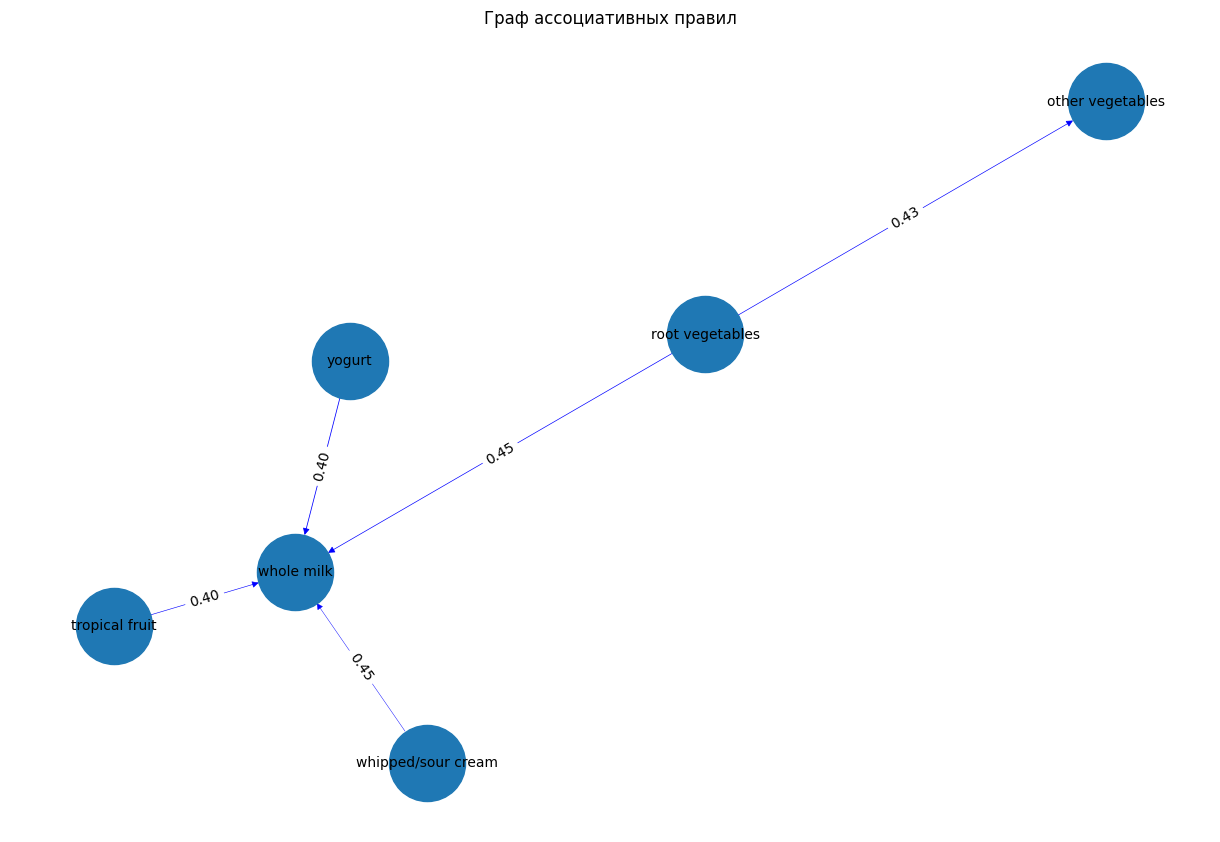

In [121]:
import networkx as nx
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules

rules = association_rules(result_fpgrowth, min_threshold=0.4, metric='confidence')

G = nx.DiGraph()

for _, row in rules.iterrows():
    antecedent = ', '.join(row['antecedents'])
    consequent = ', '.join(row['consequents'])
    support = row['support']
    confidence = row['confidence']

    G.add_edge(antecedent, consequent, weight=support * 10, label=f'{confidence:.2f}')

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, font_size=10, edge_color='b', width=[G[u][v]['weight'] for u,v in G.edges()])
labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Граф ассоциативных правил')
plt.show()

Вершины графа отображают товары.

Направление ребра указывает на вероятностную зависимость (от antecedent к consequent).

Толщина ребра пропорциональна уровню поддержки (support).

Подпись на ребре показывает уровень доверия (confidence).

Более толстые ребра указывают на более популярные комбинации товаров.